In [1]:
import arc
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
from scipy import stats

## Get ARC parameters

In [2]:
# Variables
# SF numpy files path
SF_np_path ="/home/ucfaya1@ad.ucl.ac.uk/Downloads/2021-UCL-model_output_soybean"

# Actual yield csv data path 
Actual_yield_csv = '/home/ucfaya1@ad.ucl.ac.uk/Desktop/HI_Data_yara_new_backup_v1/code_data/save_code_data\DMP_AVR_geometry30102021.csv'

In [3]:
df_actual_yield = pd.read_csv(Actual_yield_csv)

In [4]:
# Initialize an empty list to store tuples of (folder name, LAI value)
median_parameters = []

# Traverse the base directory and its subdirectories
for root, dirs, files in os.walk(SF_np_path):
    # Check if the file "SF_field.npz" exists in the current directory
    if "SF_field.npz" in files:
        # Get the full file path for the .npz file
        file_path = os.path.join(root, "SF_field.npz")

        # Load the .npz file and store its contents in a variable
        data = np.load(file_path)

        # Access the numpy array 'dat'
        if 'dat' in data:
            dat_array = data['dat']

            # Calculate the median of all the pixels in the field and all the parameters
            median_values = np.median(dat_array, axis=0)

            # Get the name of the subdirectory folder and remove "_geometry"
            FieldName = os.path.basename(root).replace("_geometry", "")

            # Append the tuple (FieldName, median values) to the list
            median_parameters.append((FieldName, median_values[0], median_values[1],
                                      median_values[2], median_values[3], median_values[4],
                                      median_values[5], median_values[6], median_values[7],
                                      median_values[8], median_values[9], median_values[10],
                                      median_values[11], median_values[12], median_values[13],
                                      median_values[14]))

        # Close the .npz file to free up resources
        data.close()

# Convert list of tuples to a DataFrame
df_parameters = pd.DataFrame(median_parameters, columns=['FieldName', 'N','Cab','Cm','Cw','LAI','Ala',
                                                         'Cbrown','m0','n0','m1','n1','B','S1','S2','SMp'])

print("DataFrame with median parameters values:")
print(df_parameters)

DataFrame with median parameters values:
                              FieldName         N       Cab        Cm  \
0                    cools stenen kruis  1.401284  1.062091  0.625518   
1        bart tormans achter stal links  1.329454  1.053469  0.648028   
2       eddy kuypers hondepensjon klein  1.252291  1.090797  0.663761   
3        koen pauwels achter stal links  1.216147  1.082522  0.682707   
4    johny mondelaars braambessenstraat  1.351278  1.041519  0.657633   
..                                  ...       ...       ...       ...   
105             guido geudens windmolen  1.123492  1.099876  0.648947   
106                jos mutten nieuwland  1.244966  1.133295  0.668041   
107         jef adriaensen schaapschoor  1.388879  1.035753  0.623888   
108          van gompel agro naast stal  1.306393  1.097735  0.654126   
109                Paul nijs goor groot  1.335297  1.052439  0.653586   

           Cw       LAI       Ala    Cbrown        m0          n0        m1  \
0  

In [5]:
nan_values = df_parameters.isna().sum()

# Print the count of NaN values for each column
print(nan_values)

FieldName    0
N            0
Cab          0
Cm           0
Cw           0
LAI          0
Ala          0
Cbrown       0
m0           0
n0           0
m1           0
n1           0
B            0
S1           0
S2           0
SMp          0
dtype: int64


In [6]:
# Merge the dataframes based on the 'Name' column
df_merged = df_actual_yield.merge(df_parameters[['FieldName','N', 'Cab', 'Cm', 'Cw', 'LAI', 'Ala', 'Cbrown', 'm0', 'n0', 'm1', 'n1','B','S1','S2','SMp']], on='FieldName', how='left')
df_merged

,FieldName,HarvestDate,Variety,HaDone%,Wet_Actual_Yield_tonsfield,AverageTonsHa,TotalArea_Ha,DMPCumulative_kgha,Average_kgha,Wet_Actual_Yield_kgfield,...,Ala,Cbrown,m0,n0,m1,n1,B,S1,S2,SMp
0,achter schuur fert aardappel,2021-09-27 05:09:37,Ivory Russet,86,136.560000,39.810418,3.3,10908.0,39810.418334,136560.00000,...,1.119314,1.966830,0.187880,173.197998,0.188330,244.553833,0.583510,16.685528,46.167412,14.510149
1,anny cuypers achter stal,2021-11-02 10:28:59,Fontane,82,229.040000,56.437783,4.9,14745.0,56437.783139,229040.00000,...,1.114340,1.683500,0.180411,172.644073,0.141152,257.658447,0.592521,21.539948,50.415909,15.570607
2,bart nijs achter paul stessens,2021-11-04 13:56:23,Challenger,98,86.020000,94.190042,0.9,13522.0,94190.042009,86020.00000,...,1.118807,1.638608,0.195741,182.342224,0.131829,279.407837,0.598979,21.229885,50.489227,13.255978
3,bart tormans achter stal links,2021-10-23 14:34:03,Fontane,91,82.963636,59.968189,1.5,14674.0,59968.188520,82963.63595,...,1.118732,1.531127,0.187685,179.215790,0.141439,258.012909,0.572753,21.182339,47.333565,19.146284
4,bart torreman bremelhoef,2021-10-24 07:04:06,Fontane,95,211.456398,73.486086,2.6,15330.0,73486.085605,211456.39795,...,1.119578,1.599794,0.208166,181.343338,0.156613,256.580322,0.568082,19.452738,49.424316,16.810888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,van gompel agro herdersdreef c,2021-10-04 12:00:18,Ivory Russet,81,431.032861,42.515155,10.6,12732.0,42515.154693,431032.86135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,van gompel agro naast stal,2021-09-30 16:40:26,Ivory Russet,95,59.564891,40.014443,1.6,11994.0,40014.442858,59564.89110,...,1.114538,1.919140,0.197170,175.552063,0.182490,248.672760,0.584901,17.339481,46.894722,13.451874
107,vermeulen hulsel,2021-10-14 08:21:46,Fontane,92,297.347040,71.744145,4.5,16953.0,71744.144570,297347.04000,...,1.098814,1.458345,0.199783,169.106445,0.173036,243.376785,0.616295,20.526218,49.560463,11.979828
108,war gijs brassel,2021-10-19 14:30:26,Fontane,96,94.292770,69.629514,1.4,13305.0,69629.514369,94292.77025,...,1.117742,1.590344,0.195289,171.610443,0.155942,250.753555,0.562412,20.917908,47.074783,18.284565


In [7]:
nan_values = df_merged.isna().sum()

# Print the count of NaN values for each column
print(nan_values)

# Create a set to store unique FieldName values with NaN
fieldnames_with_nan = set()

# Loop through columns and collect FieldName for NaN values
for column, count in nan_values.items():
    if count > 0:
        fieldnames_with_nan.update(df_merged.loc[df_merged[column].isna(), 'FieldName'].unique())

# Print the list of FieldName values with NaN
print("FieldNames with NaN values:")
for fieldname in fieldnames_with_nan:
    print(fieldname)
df_merged = df_merged.dropna()

FieldName                     0
HarvestDate                   0
Variety                       0
HaDone%                       0
Wet_Actual_Yield_tonsfield    0
AverageTonsHa                 0
TotalArea_Ha                  0
DMPCumulative_kgha            0
Average_kgha                  0
Wet_Actual_Yield_kgfield      0
DM                            0
dry_actual_average_kgha       0
dry_actual_kgfield            0
IW_Predicted_yield_kgha       0
IW_Predicted_yield_kgfield    0
geometry                      0
SoilType                      0
N                             3
Cab                           3
Cm                            3
Cw                            3
LAI                           3
Ala                           3
Cbrown                        3
m0                            3
n0                            3
m1                            3
n1                            3
B                             3
S1                            3
S2                            3
SMp     

## ARC & average yield kg/ha Analysis

R-squared (R2) Score: -0.04887415902300063


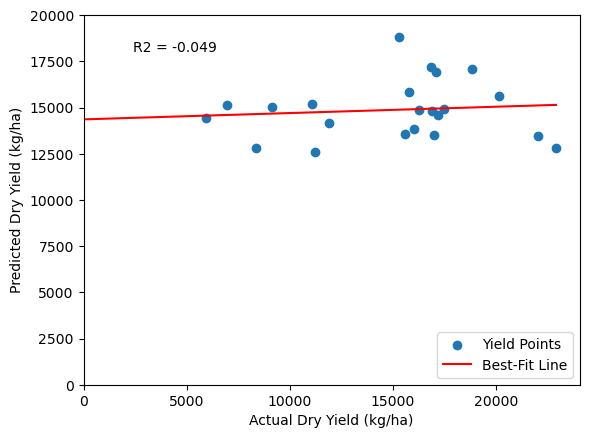

In [8]:
# Biophysical VS Avg yield 
X = df_merged[['N', 'Cab', 'Cm', 'Cw', 'LAI', 'Ala', 'Cbrown']] # Predicted dataset
y = df_merged['dry_actual_average_kgha']       # Actual dataset

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Test the model on the testing data
y_pred = model.predict(X_test)

# Assuming you have 'y_test' as the actual yield test data and 'y_pred' as the modeled predicted values
r2 = r2_score(y_test, y_pred)

print("R-squared (R2) Score:", r2)

# Scatter plot with R2 score
plt.scatter(y_test, y_pred, label='Yield Points')
plt.xlabel('Actual Dry Yield (kg/ha)')
plt.ylabel('Predicted Dry Yield (kg/ha)')
plt.text(0.1, 0.9, f'R2 = {r2:.3f}', transform=plt.gca().transAxes)

# Calculate the coefficients of the best-fit line using np.polyfit
a, b = np.polyfit(y_test, y_pred, 1)
# Plot the best-fit line
x_range = np.linspace(0, max(y_test), 100)
plt.plot(x_range, a * x_range + b, color='red', label='Best-Fit Line')
plt.legend(loc='lower right')

# Set the plot's x and y axis to start at 0 and set the upper limit of y-axis to 20000
plt.xlim(0)
plt.ylim(0,20000)

# Save the plot as an image file
plt.savefig('/home/ucfaya1@ad.ucl.ac.uk/Desktop/plots/ARCsoybean_BP_avg_2021.png', dpi=400)
plt.show()

R-squared (R2) Score: 0.2180403413276264


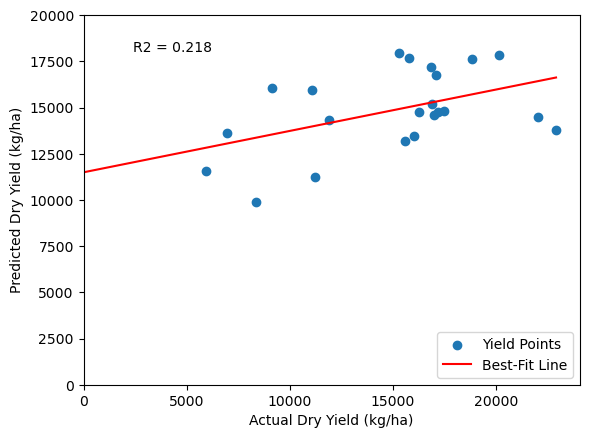

In [9]:
# biophysical + phenology VS avg yield kh/ha
X = df_merged[['N', 'Cab', 'Cm', 'Cw', 'LAI', 'Ala', 'Cbrown', 'm0', 'n0', 'm1', 'n1']] # Predicted dataset
y = df_merged['dry_actual_average_kgha']       # Actual dataset

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Test the model on the testing data
y_pred = model.predict(X_test)

# Assuming you have 'y_test' as the actual yield test data and 'y_pred' as the modeled predicted values
r2= r2_score(y_test, y_pred)

print("R-squared (R2) Score:", r2)

# Scatter plot with R2 score
plt.scatter(y_test, y_pred, label='Yield Points')
plt.xlabel('Actual Dry Yield (kg/ha)')
plt.ylabel('Predicted Dry Yield (kg/ha)')
plt.text(0.1, 0.9, f'R2 = {r2:.3f}', transform=plt.gca().transAxes)

# Calculate the coefficients of the best-fit line using np.polyfit
a, b = np.polyfit(y_test, y_pred, 1)
# Plot the best-fit line
x_range = np.linspace(0, max(y_test), 100)
plt.plot(x_range, a * x_range + b, color='red', label='Best-Fit Line')
plt.legend(loc='lower right')

# Set the plot's x and y axis to start at 0 and set the upper limit of y-axis to 20000
plt.xlim(0)
plt.ylim(0,20000)

# Save the plot as an image file
plt.savefig('/home/ucfaya1@ad.ucl.ac.uk/Desktop/plots/ARCsoybean_BP_Phen_avg_2021.png', dpi=400)
plt.show()

R-squared (R2) Score: 0.2267262737543434


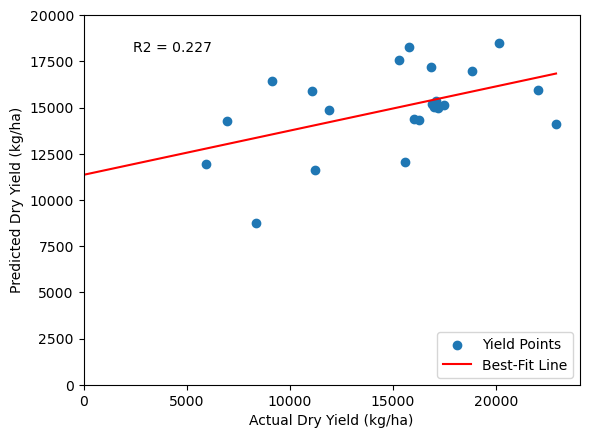

In [10]:
# 15 parameters VS avg yield kg/ha
X = df_merged[['N', 'Cab', 'Cm', 'Cw', 'LAI', 'Ala', 'Cbrown', 'm0', 'n0', 'm1', 'n1','B','S1','S2','SMp']] # Predicted dataset
y = df_merged['dry_actual_average_kgha']       # Actual dataset

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Test the model on the testing data
y_pred = model.predict(X_test)

# Assuming you have 'y_test' as the actual yield test data and 'y_pred' as the modeled predicted values
r2= r2_score(y_test, y_pred)

print("R-squared (R2) Score:", r2)

# Scatter plot with R2 score
plt.scatter(y_test, y_pred, label='Yield Points')
plt.xlabel('Actual Dry Yield (kg/ha)')
plt.ylabel('Predicted Dry Yield (kg/ha)')
plt.text(0.1, 0.9, f'R2 = {r2:.3f}', transform=plt.gca().transAxes)

# Calculate the coefficients of the best-fit line using np.polyfit
a, b = np.polyfit(y_test, y_pred, 1)
# Plot the best-fit line
x_range = np.linspace(0, max(y_test), 100)
plt.plot(x_range, a * x_range + b, color='red', label='Best-Fit Line')
plt.legend(loc='lower right')

# Set the plot's x and y axis to start at 0 and set the upper limit of y-axis to 20000
plt.xlim(0)
plt.ylim(0,20000)

# Save the plot as an image file
plt.savefig('/home/ucfaya1@ad.ucl.ac.uk/Desktop/plots/ARCsoybean_15_avg_2021.png', dpi=400)
plt.show()

### ARC & Total actual yield kg/field Analysis

R-squared (R2) Score: -0.6123370469760285


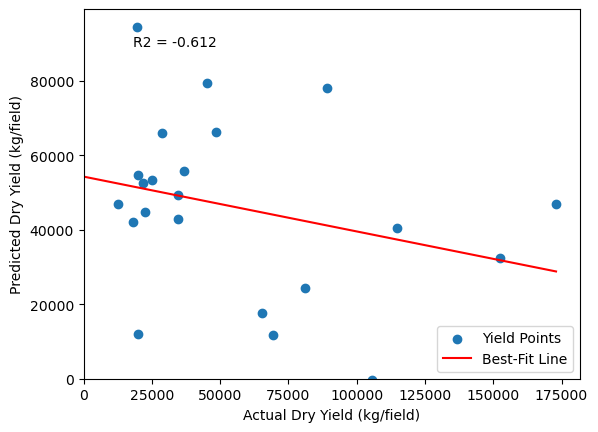

In [11]:
# Biophysical + phenology VS total yield
X = df_merged[['N', 'Cab', 'Cm', 'Cw', 'LAI', 'Ala', 'Cbrown', 'm0', 'n0', 'm1', 'n1']] # Predicted dataset
y = df_merged['dry_actual_kgfield']       # Actual dataset

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Test the model on the testing data
y_pred = model.predict(X_test)

# Assuming you have 'y_test' as the actual yield test data and 'y_pred' as the modeled predicted values
r2= r2_score(y_test, y_pred)

print("R-squared (R2) Score:", r2)

# Scatter plot with R2 score
plt.scatter(y_test, y_pred, label='Yield Points')
plt.xlabel('Actual Dry Yield (kg/field)')
plt.ylabel('Predicted Dry Yield (kg/field)')
plt.text(0.1, 0.9, f'R2 = {r2:.3f}', transform=plt.gca().transAxes)

# Calculate the coefficients of the best-fit line using np.polyfit
a, b = np.polyfit(y_test, y_pred, 1)
# Plot the best-fit line
x_range = np.linspace(0, max(y_test), 100)
plt.plot(x_range, a * x_range + b, color='red', label='Best-Fit Line')
plt.legend(loc='lower right')

# Set the plot's x and y axis to start at 0 and set the upper limit of y-axis to 20000
plt.xlim(0)
plt.ylim(0)

# Save the plot as an image file
plt.savefig('/home/ucfaya1@ad.ucl.ac.uk/Desktop/plots/ARCsoybean_BP_Phen_tot_2021.png', dpi=400)
plt.show()